In [43]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# 	Gender
# 	0: male		1: female	2: unsure
#    ----------------------------------------------------------------------
# 	Race
# 0: Caucasian		1: African-American		2: Asian
# ----------------------------------------------------------------------
# 	Age (5 ranges)
# 0: 0-3	 1: 4-19		2: 20-39		3: 40-69		4: 70+
# NOTE: raw txt file has emotion labels 1-indexed, I am shifting to zero-indexing
emotion_lookup = {
    0: "Surprise",
    1: "Fear",
    2: "Disgust",
    3: "Happiness",
    4: "Sadness",
    5: "Anger",
    6: "Neutral"
}

race_lookup = {
    0: "Caucasian",
    1: "African-American",
    2: "Asian"
}

gender_lookup = {
    0: "Male",
    1: "Female",
    2: "Unsure"
}

age_lookup = {
    0: "0-3",
    1: "4-19",
    2: "20-39",
    3: "40-69",
    4: "70+"
}

In [45]:
# Construct dataframe for train/test data attributes
data_dir = Path("../data")
raf_dir = data_dir / "RAF"
train_dir = raf_dir / "aligned_train"
test_dir = raf_dir / "aligned_test"
annot_dir = raf_dir / "manual"
labels_file = raf_dir / "list_partition_label.txt"
df = pd.read_csv(labels_file, sep=" ", header=None)
df.columns = ["Name", "Emotion"]
df["Path"] = df["Name"].apply(lambda x: os.path.join(str(train_dir), x.replace(".jpg","_aligned.jpg")) if ("train" in x) else os.path.join(str(test_dir), x.replace(".jpg","_aligned.jpg")))
df["Split"] = df["Name"].apply(lambda x: "Train" if ("train" in x) else "Test")
gender = []
race = []
age = []
for i,r in df.iterrows():
    annot_file = os.path.join(str(annot_dir), "{}_manu_attri.txt".format(r["Name"].replace(".jpg","")))
    with open(annot_file, "r") as f:
        lines = f.readlines()
        gender.append(int(lines[5]))
        race.append(int(lines[6]))
        age.append(int(lines[7]))
df["Gender"] = gender
df["Race"] = race
df["Age"] = age
# NOTE: raw txt file has emotion labels 1-indexed, I am shifting to zero-indexing
df["Emotion"] = df["Emotion"] - 1
df["EmotionLabel"] = df["Emotion"].apply(lambda x: emotion_lookup[x])
df["RaceLabel"] = df["Race"].apply(lambda x: race_lookup[x])
df["GenderLabel"] = df["Gender"].apply(lambda x: gender_lookup[x])
df["AgeLabel"] = df["Age"].apply(lambda x: age_lookup[x])
df_train = df[df["Split"]=="Train"]
df_test = df[df["Split"]=="Test"]
assert len(df) == len(df_train) + len(df_test)

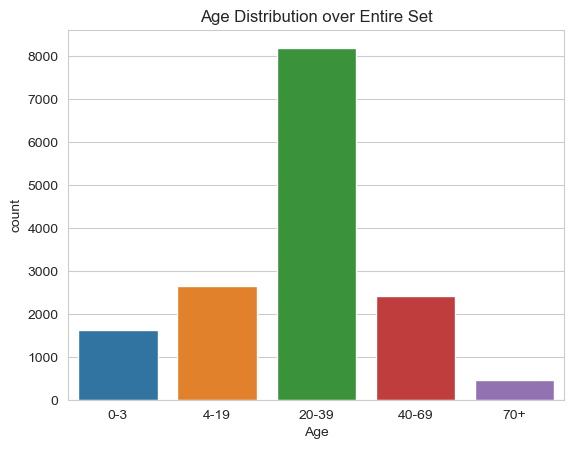

In [46]:
fig, ax = plt.subplots()
ax.set_title("Age Distribution over Entire Set")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
sns.countplot(x="Age", data=df, ax=ax)
ax.set_xticklabels([age_lookup[i] for i in range(5)])
plt.show()

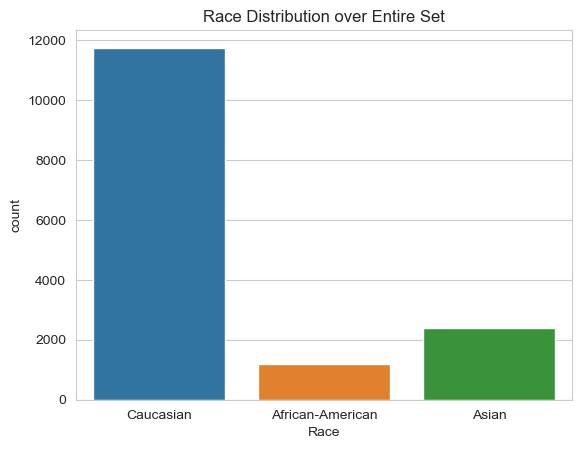

In [47]:
# race
fig, ax = plt.subplots()
ax.set_title("Race Distribution over Entire Set")
ax.set_xlabel("Race")
ax.set_ylabel("Count")
sns.countplot(x="Race", data=df, ax=ax)
ax.set_xticklabels([race_lookup[i] for i in range(3)])
plt.show()

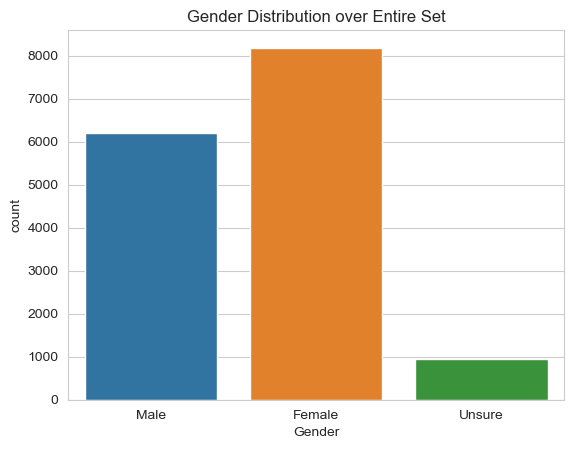

In [48]:
# gender
fig, ax = plt.subplots()
ax.set_title("Gender Distribution over Entire Set")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
sns.countplot(x="Gender", data=df, ax=ax)
ax.set_xticklabels([gender_lookup[i] for i in range(3)])
plt.show()

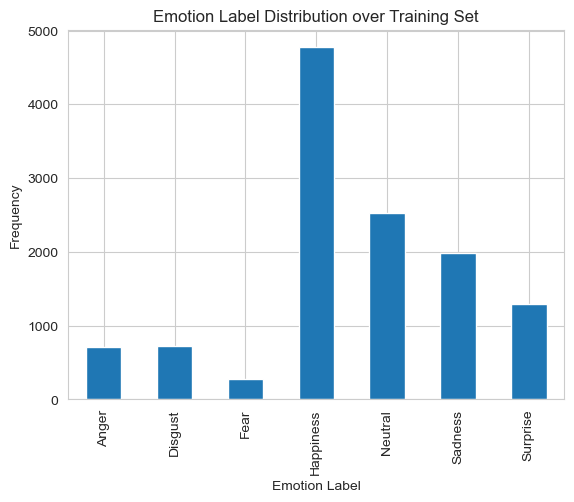

In [49]:
# Distribution of emotion labels
fig, ax = plt.subplots()
ax.set_title("Emotion Label Distribution over Training Set")
ax.set_xlabel("Emotion Label")
ax.set_ylabel("Frequency")
df_train["EmotionLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

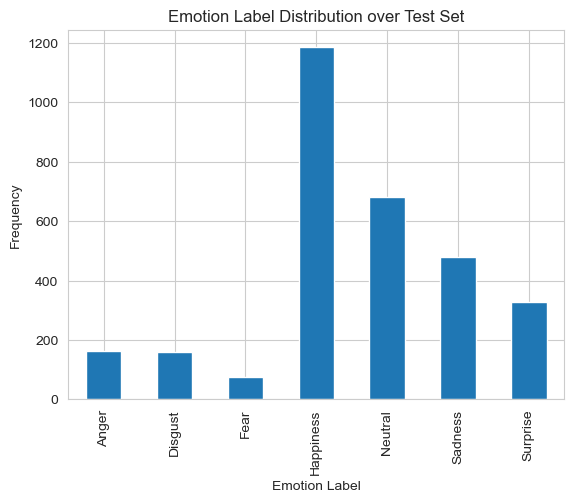

In [50]:
fig, ax = plt.subplots()
ax.set_title("Emotion Label Distribution over Test Set")
ax.set_xlabel("Emotion Label")
ax.set_ylabel("Frequency")
df_test["EmotionLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

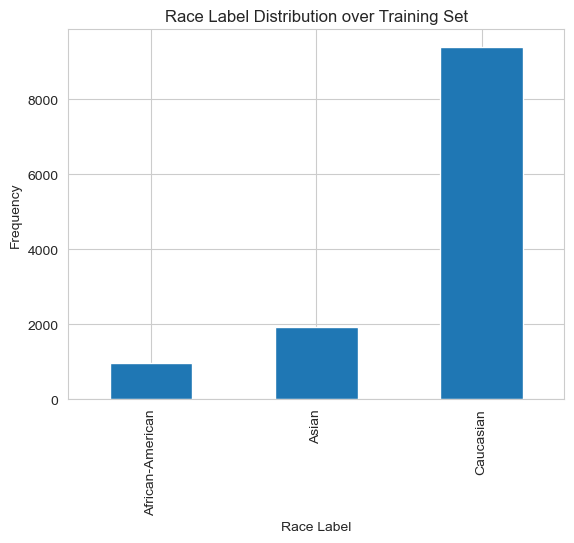

In [52]:
# Distribution of race labels
fig, ax = plt.subplots()
ax.set_title("Race Label Distribution over Training Set")
ax.set_xlabel("Race Label")
ax.set_ylabel("Frequency")
df_train["RaceLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

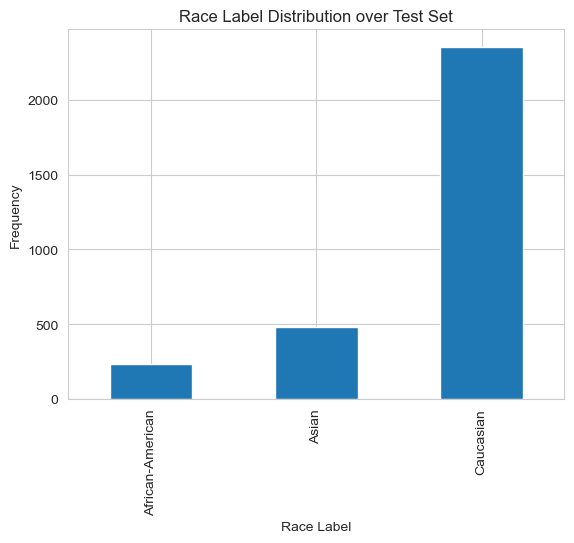

In [53]:
fig, ax = plt.subplots()
ax.set_title("Race Label Distribution over Test Set")
ax.set_xlabel("Race Label")
ax.set_ylabel("Frequency")
df_test["RaceLabel"].value_counts().sort_index().plot(ax=ax, kind='bar')
plt.show()

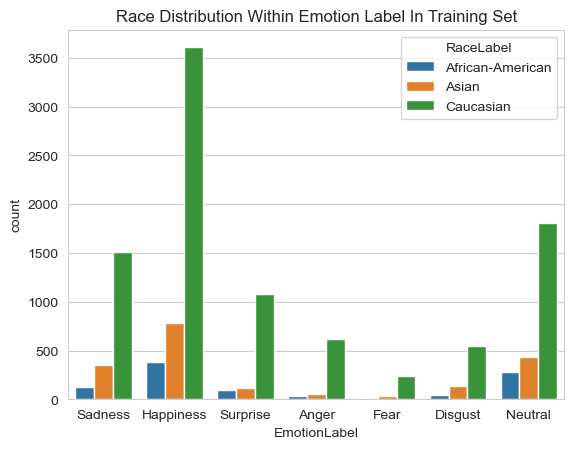

In [54]:
# Distribution of race within each emotion label
race_label_order = ["African-American", "Asian", "Caucasian"]
fig, ax = plt.subplots()
ax.set_title("Race Distribution Within Emotion Label In Training Set")
sns.countplot(data=df_train, x="EmotionLabel", hue="RaceLabel", hue_order=race_label_order, ax=ax)
plt.show()

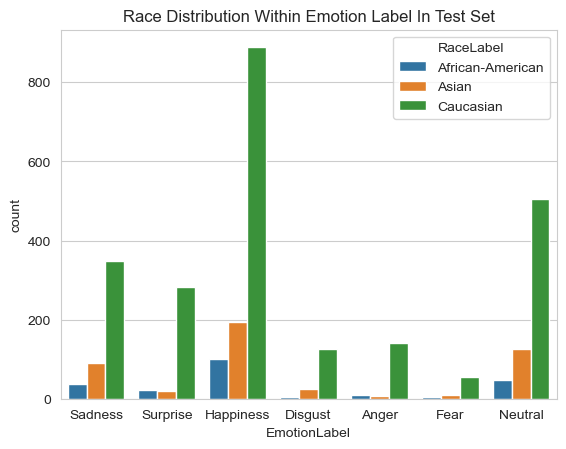

In [55]:
fig, ax = plt.subplots()
ax.set_title("Race Distribution Within Emotion Label In Test Set")
sns.countplot(data=df_test, x="EmotionLabel", hue="RaceLabel", hue_order=race_label_order, ax=ax)
plt.show()

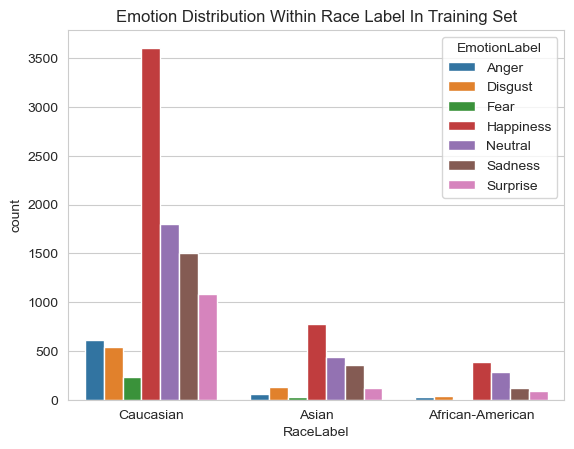

In [56]:
# Distribution of emotion within each race label
emotion_label_order = [emotion_lookup[i] for i in range(7)]
emotion_label_order.sort()
fig, ax = plt.subplots()
ax.set_title("Emotion Distribution Within Race Label In Training Set")
sns.countplot(data=df_train, x="RaceLabel", hue="EmotionLabel", hue_order=emotion_label_order, ax=ax)
plt.show()

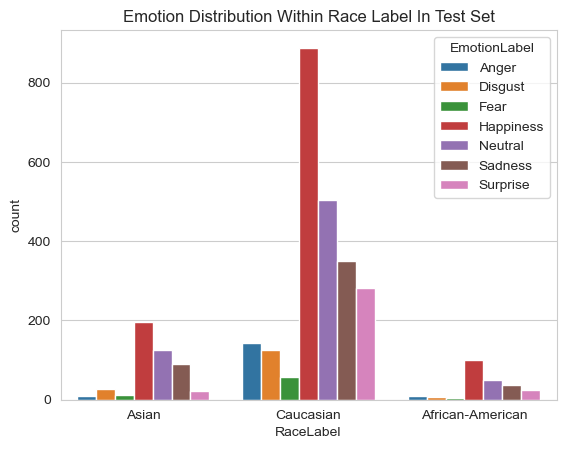

In [57]:
fig, ax = plt.subplots()
ax.set_title("Emotion Distribution Within Race Label In Test Set")
sns.countplot(data=df_test, x="RaceLabel", hue="EmotionLabel", hue_order=emotion_label_order, ax=ax)
plt.show()

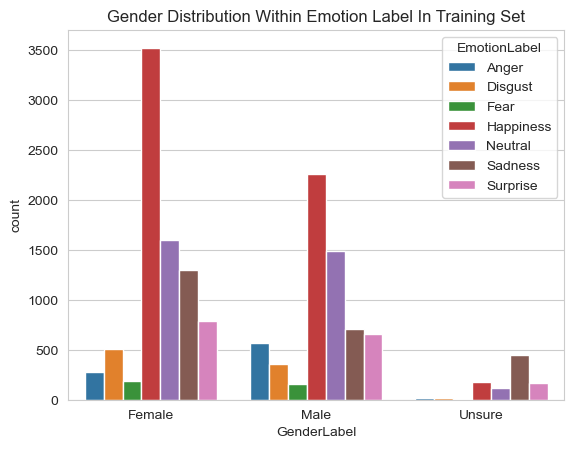

In [73]:
# Distribution of gender within each emotion label
gender_label_order = [gender_lookup[i] for i in range(3)]
gender_label_order.sort()
fig, ax = plt.subplots()
ax.set_title("Gender Distribution Within Emotion Label In Training Set")
sns.countplot(data=df, x="GenderLabel", hue="EmotionLabel", hue_order=emotion_label_order, ax=ax)
plt.show()

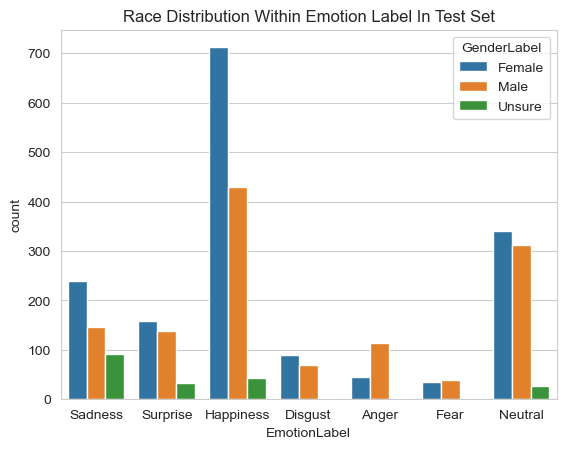

In [74]:
fig, ax = plt.subplots()
ax.set_title("Race Distribution Within Emotion Label In Test Set")
sns.countplot(data=df_test, x="EmotionLabel", hue="GenderLabel", hue_order=gender_label_order, ax=ax)
plt.show()

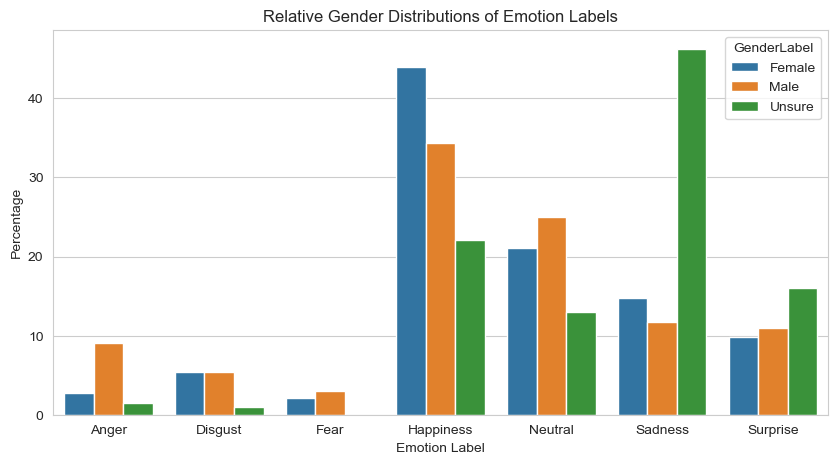

In [77]:
# normalize total number of each emotion label to 100% to show the relative gender distributions
df_test_gender_emotion_count = df_test.groupby(["GenderLabel", "EmotionLabel"]).size().reset_index(name="Count")
df_test_gender_emotion_count["Percentage"] = df_test_gender_emotion_count.groupby("GenderLabel", group_keys=False)["Count"].apply(lambda x: x / x.sum() * 100)
df_test_gender_emotion_count = df_test_gender_emotion_count.sort_values(by=["GenderLabel", "EmotionLabel"])

# plot the relative gender distributions
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x="EmotionLabel", y="Percentage", hue="GenderLabel", data=df_test_gender_emotion_count, ax=ax)
ax.set_title("Relative Gender Distributions of Emotion Labels")
ax.set_xlabel("Emotion Label")
ax.set_ylabel("Percentage")
plt.show()

In [78]:
df.head()

,Name,Emotion,Path,Split,Gender,Race,Age,EmotionLabel,RaceLabel,GenderLabel,AgeLabel
0,train_00001.jpg,4,../data/RAF/aligned_train/train_00001_aligned.jpg,Train,1,0,2,Sadness,Caucasian,Female,20-39
1,train_00002.jpg,4,../data/RAF/aligned_train/train_00002_aligned.jpg,Train,1,0,2,Sadness,Caucasian,Female,20-39
2,train_00003.jpg,3,../data/RAF/aligned_train/train_00003_aligned.jpg,Train,1,2,2,Happiness,Asian,Female,20-39
3,train_00004.jpg,3,../data/RAF/aligned_train/train_00004_aligned.jpg,Train,1,0,2,Happiness,Caucasian,Female,20-39
4,train_00005.jpg,4,../data/RAF/aligned_train/train_00005_aligned.jpg,Train,1,2,1,Sadness,Asian,Female,4-19


## Splits

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Validation split
df_train_sp, df_val_sp = train_test_split(df_train, test_size=0.2, random_state=5)

In [62]:
# Write to file
splits_dir = raf_dir / "splits"
os.makedirs(splits_dir, exist_ok=True)
df_train_sp.to_csv(os.path.join(str(splits_dir), "train_files.csv"))
df_val_sp.to_csv(os.path.join(str(splits_dir), "val_files.csv"))
df_test.to_csv(os.path.join(str(splits_dir), "test_files.csv"))
# original train
df_train.to_csv(os.path.join(str(splits_dir), "original_train_files.csv"))